## The `pandas` Package

When working with data, the `pandas` package is extremely useful. It can read data from many file formats and databases, and it provides convenient tools for processing data, computing basic statistics, and creating quick plots.

### DataFrame

A **DataFrame** is the primary `pandas` data structure. Conceptually it is a table: named columns represent features and rows correspond to individual records. For example, if you have data with features `feat1`, `feat2`, and `feat3`, you can create a DataFrame like this:


In [1]:
import pandas as pd

df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]], columns=["feat1", "feat2", "feat3"])
print(df)

   feat1  feat2  feat3
0      1      2      3
1      4      5      6
2      7      8      9
3     10     11     12
4     13     14     15


Selection of particular columns is easy. You can acces them by their name, as a key in a dictionary, or as an objects' attribute.



In [2]:
a = df["feat1"]
print(a)

0     1
1     4
2     7
3    10
4    13
Name: feat1, dtype: int64


In [3]:
print(df.feat1)

0     1
1     4
2     7
3    10
4    13
Name: feat1, dtype: int64


In [4]:
b = df[["feat2", "feat3"]]
print('df[["feat2", "feat3"]] = \n{}'.format(b))

df[["feat2", "feat3"]] = 
   feat2  feat3
0      2      3
1      5      6
2      8      9
3     11     12
4     14     15


Note that if you extract a column from a pandas `DataFrame`, you get a `Series` — a one-dimensional, labeled array that can hold values of any data type.


In [5]:
type(df.feat1)

pandas.core.series.Series

You can add new columns by indexing the `DataFrame` with the new column name and assigning an expression to it:


In [6]:
df["feat4"] = df["feat2"] + df["feat3"]
print(df)

   feat1  feat2  feat3  feat4
0      1      2      3      5
1      4      5      6     11
2      7      8      9     17
3     10     11     12     23
4     13     14     15     29


Attribute `columns` can be used to get the list of all columns:



In [7]:
cols = df.columns
print(cols)

Index(['feat1', 'feat2', 'feat3', 'feat4'], dtype='object')


To select all rows of the column at index `1` (the second column), use the integer-location indexer `iloc` with a row slice and the column index. The first argument should be `:` to select all rows and the second should be the column index (zero-based). Passing a scalar column index returns a `Series`, while passing a one-element list for the column index returns a `DataFrame`. Use `loc` for label-based selection if you prefer.




In [8]:
a = df.iloc[:, 1]
print(a)

0     2
1     5
2     8
3    11
4    14
Name: feat2, dtype: int64


We can also select multiple rows in the same way. If we omit the column index, all columns are selected.


In [ ]:
a = df.iloc[1:3]
print(a)

By using the attribute `.values`, we can extract the data from the dataframe in the form of a standard `numpy` array:



In [ ]:
print(f"df as numpy array:\n{df.values}")
print(f"Type: {type(df.values)}")

### Reading Data from a CSV File (also via URL)

CSV file are simple text files containing data separated by commas, e.g.:

```
5.1,3.5,1.4,0.2,setosa
7.0,3.2,4.7,1.4,versicolor
6.7,3.1,5.6,2.4,virginica
```
In the `pandas` package, a CSV file can be loaded using function `read_csv`:



In [9]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?id=1R44KuRo_yT9lgCq1N4mGOBmYcxMugV03')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This function accepts several arguments that may need to be configured — for example, use `sep=';'` if the entries are separated by semicolons rather than commas. You can also set `header=False` if the CSV has no header row. Many other options are available.


### Simple plots and statistics

The `pandas` package can also compute basic statistical measures and create simple plots. To display summary statistics for the distribution of values in a column, use the `describe()` method.



In [10]:
print(df.iloc[:, 0].describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


#### Boxplot

The dataframe interface makes it easy to display boxplots using the builtin `boxplot` function. Boxplots present information akin to that provided by `describe` in graphical form:



<Axes: >

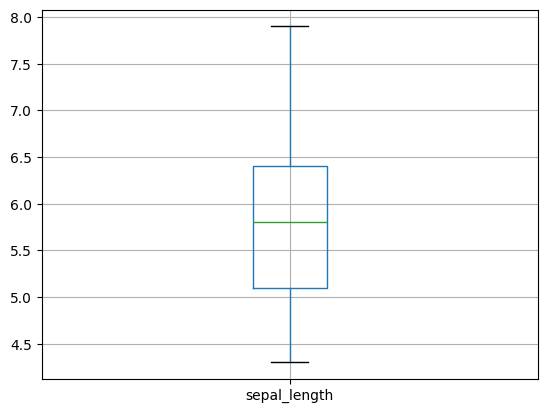

In [11]:
df.boxplot(column=df.columns[0])

#### Comparing Boxplots Across Classes

If we want to compare boxplots across all individual classes, we can do the following:



In [12]:
df.boxplot(column=df.columns[0], by='species')

<Axes: title={'center': 'sepal_length'}, xlabel='species'>

#### Histograms

It is similarly easy to display histograms of the dataframe columns:



In [13]:
df[df.columns[0]].plot(bins=20, kind='hist')

<Axes: title={'center': 'sepal_length'}, ylabel='Frequency'>

#### Comparing Histograms

If we want to compare histograms across the classes, we can use the following:



In [14]:
df.hist(column=df.columns[0], by='species', bins=50,
        sharex=True, sharey=True, figsize=[10, 8])

array([[<Axes: title={'center': 'setosa'}>,
        <Axes: title={'center': 'versicolor'}>],
       [<Axes: title={'center': 'virginica'}>, <Axes: >]], dtype=object)

### Applying an arbitrary function to an entire column

In the code above we showed how to create a new column. You can also create new columns by applying an arbitrary function to an existing column. To do this, use a `lambda` expression together with the [map](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html) method (or `apply()` for more general cases).

For example, to determine the length of each string in the `species` column and assign the results to a new column run the following:



In [15]:
# the calculation of lengths and assignment to "len" column
df["len"] = df["species"].map(lambda x: len(x))

# we display a few samples
df["len"].iloc[[0, 1, 50, 80, 100, 101]]

0       6
1       6
50     10
80     10
100     9
101     9
Name: len, dtype: int64

### Group Comparisons and Indexing

Similar to NumPy arrays, you can find and index entries that meet a condition in DataFrames. For instance, you can select rows in which the value of the first column is greater than $5$.


In [16]:
a = df[df.iloc[:, 0] > 5]
a.head()

,sepal_length,sepal_width,petal_length,petal_width,species,len
0,5.1,3.5,1.4,0.2,setosa,6
5,5.4,3.9,1.7,0.4,setosa,6
10,5.4,3.7,1.5,0.2,setosa,6
14,5.8,4.0,1.2,0.2,setosa,6
15,5.7,4.4,1.5,0.4,setosa,6


### Concatenating dataframes

To demonstrate concatenation of DataFrames, we create a list of three simple dictionaries representing item frequencies. Next, we convert the list using list comprehension into a list of dataframes.


In [ ]:
dict_1 = {"A": 1, "B": 2}
dict_2 = {"A": 2, "C": 3}
dict_3 = {"B": 0, "C": 1}

dict_list = [dict_1, dict_2, dict_3]

df_list = [pd.DataFrame([dct]) for dct in dict_list]

You can use `pd.concat` to concatenate those DataFrames along the rows.


In [ ]:
dict_df = pd.concat(df_list)
dict_df

Note that columns not present in the dictionaries are filled with `NaN`. Since the values represent frequencies, you can replace `NaN` with zeros using the `fillna()` method.


In [ ]:
dict_df.fillna(0, inplace = True)
dict_df

Also note that concatenation preserves the original row indexes (see the [Index documentation](https://pandas.pydata.org/docs/reference/api/pandas.Index.html)). You can change the index using `set_index()`.

In [ ]:
dict_df.set_index(pd.Index(list(range(0,3))), inplace = True)
dict_df

# Tasks #1

1. Given the lists of items below, count the items in each list and store their frequencies in a dictionary where the key is the item and the value is its frequency. You can use `np.unique` to obtain the frequencies.

2. After obtaining the frequency dictionary for each list, convert them to `DataFrame`s.

3. Compute and return the element-wise sum of the first two columns of each `DataFrame`.

4. Create a new column in each `DataFrame` that is the sum of the first and third columns.


In [ ]:
import numpy as np
shopping_basket_1 = ["cake", "carrot", "apple", "apple", "carrot", "apple","beer",
                   "beer", "juice","chicken", "chicken"]
shopping_basket_2 = ["beer", "chips","juice","chicken", "beer", "beer", "carrot",
                     "apple","beer"]
shopping_basket_3 = ["carrot", "carrot",  "apple", "apple", "banana", "banana"]


basket_list = [shopping_basket_1, shopping_basket_2, shopping_basket_3]

# Tasks #2

1. Create a pandas `DataFrame` `my_df` with 20 rows and columns `height`, `weight`, and `age`, filled with random numbers that approximate realistic values for these metrics (units: cm, kg, years).  

2. Multiply the maximum value in the `weight` column by `10`.  

3. Replace the (current) maximum value in the `weight` column with `NA` (e.g., `np.nan` or `pd.NA`).  

4. Fill the `NA` value with the mean of the `weight` column using `fillna()`.